# Plots

In [1]:
import src.utils.preprocessing as pre
import src.utils.plotting as plot
import src.models.sentiment_analysis as sa
import src.models.topics_extraction as te
import src.Data.scrape as scraper

c:\Users\alexa\miniconda3\envs\ada\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Import Data
We already clean the data and preprocess it so we can do some analysis (parsing the vote, replaceing some characters, etc)

In [2]:
data = pre.import_RFA()

In [4]:
attempt = scraper.scrape_by_name_test(['BDD'])
for name, questions in attempt.items():
    print("NAME: ", name)
    for question, answer in  questions.items():
        print(f"Question: {question}, answer: {answer}")

NAME:  BDD
Question:  What administrative work do you intend to take part in?\n, answer: A: I primarily intend to work on the RM backlog and administer XfDs, especially RfD and AfD. I'd also like to keep CSD and PROD flowing nicely. I can't think of any administrative tasks I'd be uncomfortable performing or unwilling to tackle; I do want to start off with work I'm already familiar with.
Question:  What are your best contributions to Wikipedia, and why?\n, answer: A: I wasn't quite sure what say here. I'm really a generalist, both on Wikipedia and in my professional life. I tell people, half jokingly, that as a librarian it's my job to organize and classify topics I know nothing about. But I really enjoy that sort of thing, whether it's applying detailed Library of Congress Subject Headings to a book on electrical engineering or copy editing articles on cities in India I had never heard of before. I joined WikiProject Idaho a few days ago, but until then, my only affiliations were with

In [3]:
attempt = scraper.scrape_by_name(['BDD'])
for name, questions in attempt.items():
    print("NAME: ", name)
    for question, answer in  questions.items():
        print(f"Question number: {question}, answer: {answer}")

NAME:  BDD
Question number:  What are your best contributions to Wikipedia, and why?\n, answer: A: I wasn't quite sure what say here. I'm really a generalist, both on Wikipedia and in my professional life. I tell people, half jokingly, that as a librarian it's my job to organize and classify topics I know nothing about. But I really enjoy that sort of thing, whether it's applying detailed Library of Congress Subject Headings to a book on electrical engineering or copy editing articles on cities in India I had never heard of before. I joined WikiProject Idaho a few days ago, but until then, my only affiliations were with WikiProjects Merge and Redirect, plus the Guild of Copy Editors. Creating articles can be a delight. Most that I've created are fairly short, though I am proud of Pro-Life (politician)See below and 007 (Shanty Town). But I really like behind-the-scenes sort of work. I think it's become very sexy these days to identify as a WikiGnome, but this is often how I approach the

## Scraping

Right now, we are just showing the scraping for a couple of names since we still need to format a lot of the scraped data. Some users use old links to answer the default question, there are additional questions and sometimes there are no additional questions. All of this need a bit more work but overall it should not be too much of a problem. This should be enough to show that wikipedia API can be scraped to get the necessary questions and answers that we need to understand the topic and correlation of the discussion.

In [ ]:
questions_answers = scraper.scrape()
for name, qa in questions_answers.items():
    print("NAME: ", name)
    for question, answer in qa.items():
        print("QUESTION: ", question)
        print("ANSWER: ", answer)
    #just show one to make it clean
    break

NAME:  (aeropagitica)
QUESTION:   What sysop chores, if any, would you anticipate helping with? Please check out Category:Wikipedia backlog, and read the page about administrators and the administrators' reading list.\n
ANSWER:  Closing WP:AFD debates.\nWatch and contribute to WP:ANI and WP:AN\nrollback button use against vandals.\nuse WP:VIP, WP:AIV and CryptoDerek's VandalFighter application to work against vandalism.\nBlocking vandal accounts.\ncategorising Uncategorised pages\nmonitoring recent changes.


In [4]:
attempt = scraper.scrape_by_name_test(data['TGT'].unique())
for name, qa in attempt.items():
    print("NAME: ", name)
    for question, answer in qa.items():
        print("QUESTION: ", question)
        print("ANSWER: ", answer)
    #just show one to make it clean

<b>1.</b>
[None, None]
<b>1.</b>
[None, None]
NAME:  BDD
QUESTION:   What administrative work do you intend to take part in?\n
ANSWER:  A: I primarily intend to work on the RM backlog and administer XfDs, especially RfD and AfD. I'd also like to keep CSD and PROD flowing nicely. I can't think of any administrative tasks I'd be uncomfortable performing or unwilling to tackle; I do want to start off with work I'm already familiar with.
NAME:  Bilby
QUESTION:   What administrative work do you intend to take part in?\n
ANSWER:  A: I haven't been to RfA before, because my focus has always been on writing and referencing - I was worried that admin work would mean I would have less time to work on articles. However, I've been finding that my background means that I can help out with copyright violations, and it is an area which is both much needed and always in need of assistance. So my main area will be at CCI. That said, there are other jobs where I hope I can assist, especially in areas wh

## Distribution of comment size

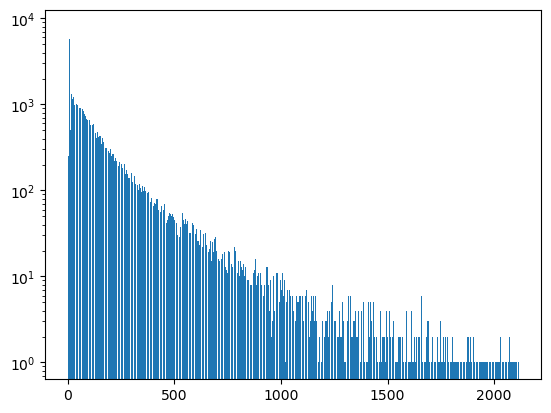

In [6]:
plot.comment_size(data)

The comment size shows a bit on the activity of users in the discussion forum. It can easily be seen that most users have minimal to no comment in the discussion panel with some having a lot

## Number of comments across years
Plots the number of votes per year between the years 2003 and 2013
We can see how the number of votes vary between the years, it peaked in 2006 then it keeps going down

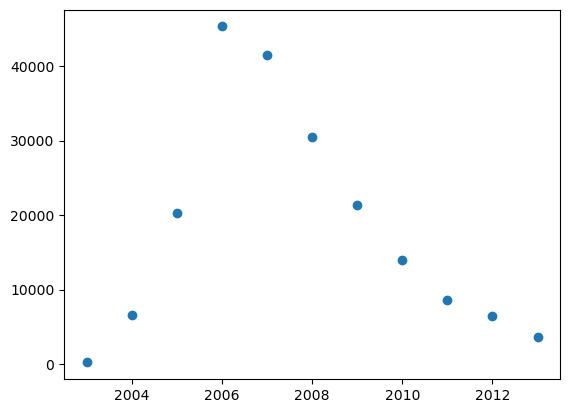

In [7]:
plot.plot_byYear(data)

## Number of participations per voters
We plots the number of votes per user in a box plot format, the 1601 votes outlier is the aggregate of the people whose username was not recorded during their vote. As we can see, there are some groups who votes quite a lot but most people have low participation rate

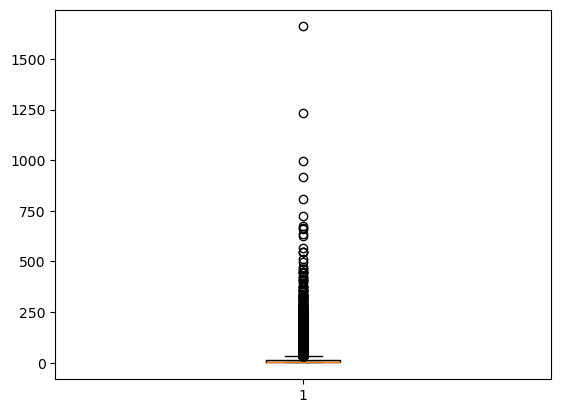

In [8]:
plot.boxplot_byUser(data)

## Votes by Target 
Plots the number of votes each candidate has received in a box plot. We can see similar patterns as vote per user as most data values are concentrated around the lower end, while some extreme values (outliers) stretch far above.

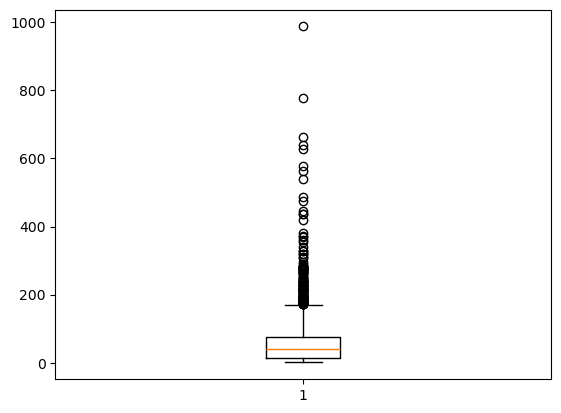

In [9]:
plot.boxplot_byTarget(data)

## Sentiment Analysis
We use hugging face model to perform the anlysis on 10% of our dataset (just to show the feasibility). We are exploring the model right now and choosing which one we can efficiently use and have better accuracy in this scenario. Right now, the huggingface model just helps with the preprocessing we need to advance to the next step. But, the goal is to accurately get the intensity data of the sentiment analysis instead of just 0 and 1, that is the important part in this step (we tried using VADER as well with polarity scores but hugging face model performs better). We will improve this in the future with better model and more robust classification to indicate the intensity we need.

In [ ]:
sa.sa_hug(sa.sampling(data))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\alexa\miniconda3\envs\ada\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\alexa\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Deve

## Topic Analysis
We are using keyBERT to extract the main topic in questions and answers. Right now, it is still using dummy questions and answers we manually get since we just want to test the overall topic extraction. Soon, we will automate it with the scraped data and see where each topic can influence the decision of the voting

In [ ]:
a,b = te.example_input()
te.extract_topic(a,b)

Q: Usually Admins Ive seen around involve themselves in keeping watch over at least one contentious topic, whether it be Politics of the United States, or Israeli–Palestinian conflict or Grand Theft Auto, or whatever else. Do you plan to focus your prospective Sysop powers onto the subject of any of these, or any other contentious topic?
A: Ive generally stayed away from admining contentious topics as I have spent so much time sitting on the committee, implementing and updating them. As such, Id rather not risk WP:INVOLVEment in the areas - plus, in addition, the topics dont particularly interest me. Im afraid I cant say I expect to spend my time at any contentious topics.
Main Topic: admining contentious topics

Q: How much time do you have to be doing administrator work? It is very demanding.
A: Administrative tasks take up about 40% of my time and are very demanding.
Main Topic: time doing administrator

Q: what do you do when someone doesnt follow the rules
A: i like to show collab